In [ ]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


In [ ]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Image as IPImage

In [ ]:
data_path='/content/CIFAR-10-images/test'


In [ ]:
data_path

'/content/CIFAR-10-images/test'

In [ ]:
image_dir=os.path.join(data_path)


In [ ]:
CATEGORIES=[]
for i in os.listdir(image_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['horse', 'ship', 'frog', 'cat', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane']


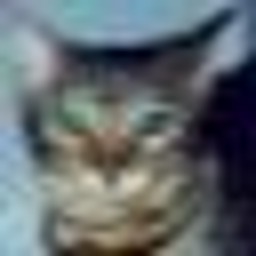

In [ ]:
# Choose a random category
random_category = random.choice(CATEGORIES)

# Get a list of image files in the selected category
image_files = os.listdir(os.path.join(image_dir, random_category))

# Choose a random image file from the category
random_image_file = random.choice(image_files)

# Load and display the random image
image_path = os.path.join(image_dir, random_category, random_image_file)
image = Image.open(image_path)
image=image.resize((256,256))
display(image)


## Preprocess the dataset

In [ ]:
X=[]
y=[]

for category in CATEGORIES:
  path=os.path.join(image_dir,category)
  for image in os.listdir(path):
    image_path=os.path.join(path,image)
    image=Image.open(image_path)
    #Converting into grayscale
    image=image.convert('L')
    image=image.resize((64,64))
    # Converting into numpy image
    img_array=np.array(image)
    X.append(img_array)
    y.append(CATEGORIES.index(category))


In [ ]:
X[10]

array([[ 91,  98, 112, ...,  46,  50,  51],
       [ 97, 104, 118, ...,  52,  53,  53],
       [111, 117, 131, ...,  66,  60,  57],
       ...,
       [187, 188, 190, ...,  76,  61,  54],
       [173, 176, 180, ..., 137, 126, 119],
       [167, 170, 175, ..., 167, 156, 150]], dtype=uint8)

In [ ]:
len(y)

10000

In [ ]:
len(X)

10000

## Model Building and Evaluation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statistics import mean

In [ ]:
%%time
k_fold=KFold(n_splits=5,shuffle=True,random_state=42)

# Some k values
k_value=[1,3,5,7,9,11,13,15,17,19]

#List of accuracies for Manhattan & Euclidean distance
acc_manhattan=[]
acc_euclidean=[]
avg_acc_manhattan=[]
avg_acc_euclidean=[]


X=[image.reshape(-1) for image in X]

for k in k_value:
  fold_acc_manhattan=[]
  fold_acc_euclidean=[]

  #Performing k-fold
  for fold,(train_index,val_index) in enumerate(k_fold.split(X),start=1):

    X_train, X_validation = [X[i] for i in train_index], [X[i] for i in val_index]
    y_train, y_validation = [y[i] for i in train_index], [y[i] for i in val_index]

    # Build a k-NN classifier using Manhattan (L1) distance with current K
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_validation)
    accuracy_manhattan_fold = accuracy_score(y_validation, y_pred_manhattan)
    fold_acc_manhattan.append(accuracy_manhattan_fold)

    # Build a k-NN classifier using Euclidean (L2) distance with current K
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_validation)
    accuracy_euclidean_fold = accuracy_score(y_validation, y_pred_euclidean)
    fold_acc_euclidean.append(accuracy_euclidean_fold)

    # Print accuracy for the current fold
    print(f'For k = {k} -- Fold {fold}')
    print(f'Accuracy Manhattan: {accuracy_manhattan_fold:.2f}')
    print(f'Accuracy Euclidean: {accuracy_euclidean_fold:.2f}')

    print('-' * 30)
  # Compute the mean accuracy for the current K
  avg_accuracy_manhattan = np.mean(fold_acc_manhattan)
  avg_accuracy_euclidean = np.mean(fold_acc_euclidean)

  #Store average accuracies
  avg_acc_manhattan.append(avg_accuracy_manhattan)
  avg_acc_euclidean.append(avg_accuracy_euclidean)


  acc_manhattan.append(fold_acc_manhattan)
  acc_euclidean.append(fold_acc_euclidean)


# print(f'Average Accuracy Manhattan : {avg_acc_manhattan}')
# print(f'Average Accuracy Euclidean : {avg_acc_euclidean}')


print('-' * 30)


For k = 1 -- Fold 1
Accuracy Manhattan: 0.26
Accuracy Euclidean: 0.24
------------------------------
For k = 1 -- Fold 2
Accuracy Manhattan: 0.26
Accuracy Euclidean: 0.24
------------------------------
For k = 1 -- Fold 3
Accuracy Manhattan: 0.24
Accuracy Euclidean: 0.22
------------------------------
For k = 1 -- Fold 4
Accuracy Manhattan: 0.28
Accuracy Euclidean: 0.26
------------------------------
For k = 1 -- Fold 5
Accuracy Manhattan: 0.26
Accuracy Euclidean: 0.25
------------------------------
For k = 3 -- Fold 1
Accuracy Manhattan: 0.26
Accuracy Euclidean: 0.24
------------------------------
For k = 3 -- Fold 2
Accuracy Manhattan: 0.28
Accuracy Euclidean: 0.25
------------------------------
For k = 3 -- Fold 3
Accuracy Manhattan: 0.26
Accuracy Euclidean: 0.23
------------------------------
For k = 3 -- Fold 4
Accuracy Manhattan: 0.27
Accuracy Euclidean: 0.26
------------------------------
For k = 3 -- Fold 5
Accuracy Manhattan: 0.26
Accuracy Euclidean: 0.25
---------------------

## Result and Analysis

In [ ]:
for i, k in enumerate(k_value):
    if i < len(avg_acc_manhattan) and i < len(avg_acc_euclidean):
        print(f'K={k}')
        print(f'Mean Accuracy (Manhattan): {avg_acc_manhattan[i]:.2f}')
        print(f'Mean Accuracy (Euclidean): {avg_acc_euclidean[i]:.2f}')
        print('-' * 30)

K=1
Mean Accuracy (Manhattan): 0.26
Mean Accuracy (Euclidean): 0.24
------------------------------
K=3
Mean Accuracy (Manhattan): 0.27
Mean Accuracy (Euclidean): 0.24
------------------------------
K=5
Mean Accuracy (Manhattan): 0.27
Mean Accuracy (Euclidean): 0.25
------------------------------
K=7
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.26
------------------------------
K=9
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.26
------------------------------
K=11
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.26
------------------------------
K=13
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.25
------------------------------
K=15
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.25
------------------------------
K=17
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.25
------------------------------
K=19
Mean Accuracy (Manhattan): 0.28
Mean Accuracy (Euclidean): 0.25
------------------------------


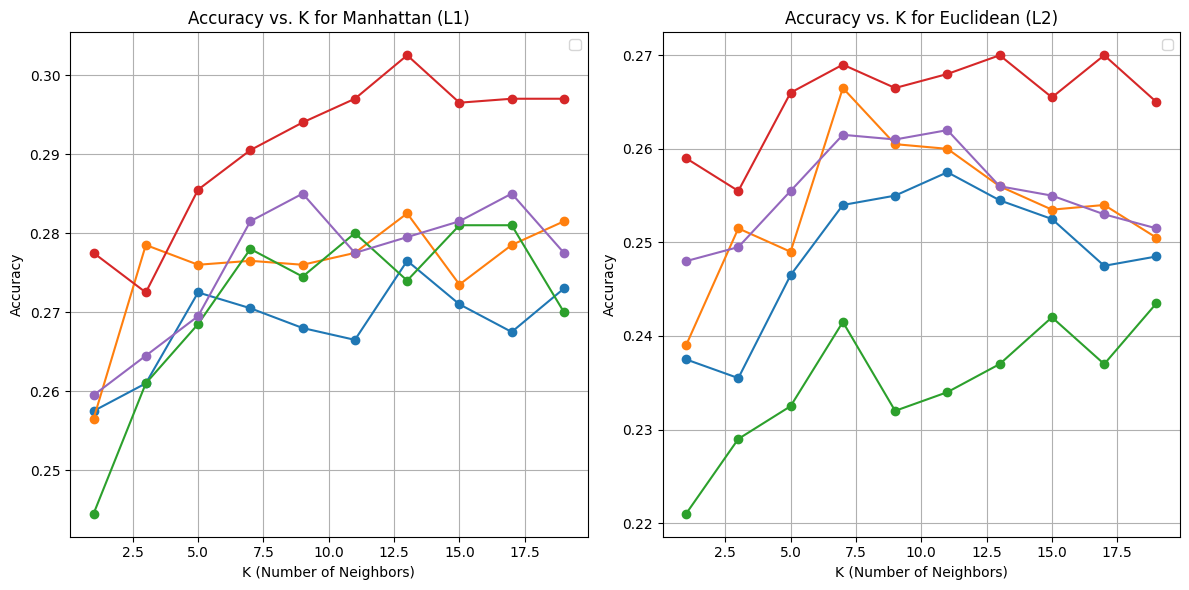

In [ ]:
# Plot two separate graphs
plt.figure(figsize=(12, 6))

# Manhattan (L1) distance graph
plt.subplot(1, 2, 1)
plt.plot(k_value, acc_manhattan, marker='o')
plt.title('Accuracy vs. K for Manhattan (L1)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Euclidean (L2) distance graph
plt.subplot(1, 2, 2)
plt.plot(k_value, acc_euclidean, marker='o')
plt.title('Accuracy vs. K for Euclidean (L2)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

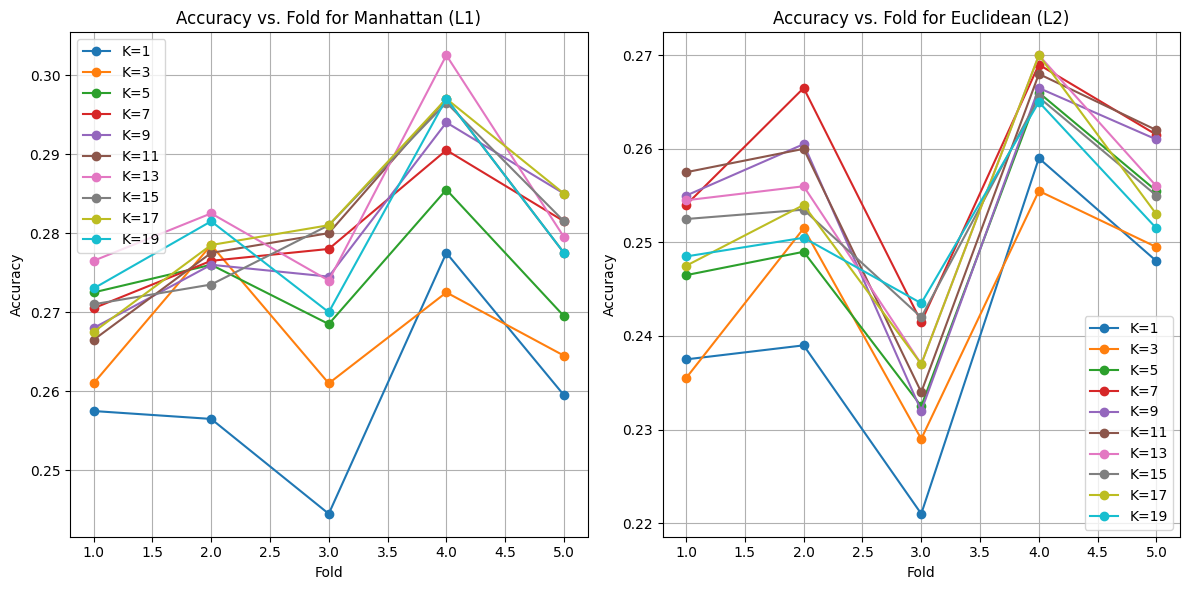

In [ ]:
# Plot two separate graphs
plt.figure(figsize=(12, 6))

# Manhattan (L1) distance graph
plt.subplot(1, 2, 1)
for i, k in enumerate(k_value):
    plt.plot(range(1,6), acc_manhattan[i], marker='o', label=f'K={k}')
plt.title('Accuracy vs. Fold for Manhattan (L1)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Euclidean (L2) distance graph
plt.subplot(1, 2, 2)
for i, k in enumerate(k_value):
    plt.plot(range(1,6), acc_euclidean[i], marker='o', label=f'K={k}')
plt.title('Accuracy vs. Fold for Euclidean (L2)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

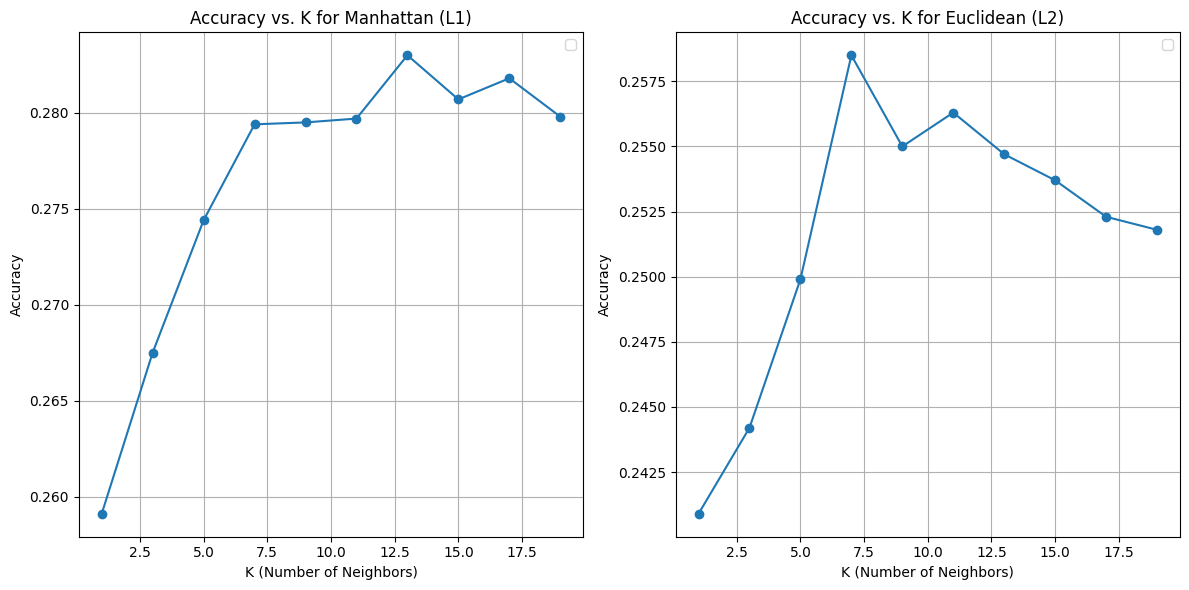

In [ ]:
# Plot two separate graphs
plt.figure(figsize=(12, 6))

# Manhattan (L1) distance graph
plt.subplot(1, 2, 1)
plt.plot(k_value, avg_acc_manhattan, marker='o')
plt.title('Accuracy vs. K for Manhattan (L1)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Euclidean (L2) distance graph
plt.subplot(1, 2, 2)
plt.plot(k_value, avg_acc_euclidean, marker='o')
plt.title('Accuracy vs. K for Euclidean (L2)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Discussion
### K-value:

*   As K increases, the accuracy of the classification generally improves for both Manhattan and Euclidean distances.
*   For K = 1, the accuracy for both distances is relatively low, indicating that the model is sensitive to noise or local variations in the data.
Starting from K = 5 and beyond, there is a more consistent improvement in accuracy for both Manhattan and Euclidean distances.
*   As K becomes larger (K=7 and beyond), the gap in accuracy between Manhattan and Euclidean narrows, but Manhattan still maintains a slight advantage.

### Distance Metrix Comparison
*   Generally, the Manhattan (L1) distance metric performs better in terms of accuracy compared to the Euclidean (L2) metric for all values of K.
*   The difference in accuracy between the two distance metrics is most noticeable at smaller values of K (K=1, K=3), where Manhattan consistently outperforms Euclidean.
   
*   The curse of dimensionality can affect the performance of Euclidean distance, making it less reliable. Manhattan distance is less affected by dimensionality because it considers distances along each axis independently.
*   Both Manhattan (L1) and Euclidean (L2) distances perform similarly across different values of K.
*   There is no significant difference in accuracy between the two distance metrics, and they exhibit consistent patterns.


#### In conclusion, based on the results, Manhattan distance appears to be a better choice for classifying CIFAR-10 images with KNN.  

## Top 5 predictions

Test Image 1 (True Label: 4)
 Prediction 1 (Label: 4)


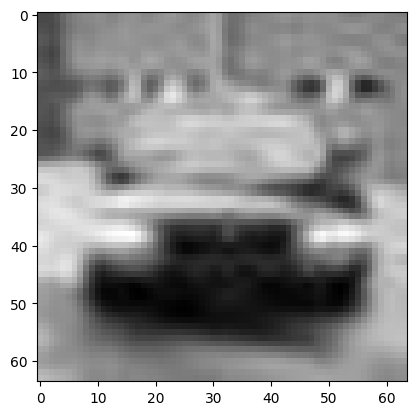

 Prediction 2 (Label: 1)


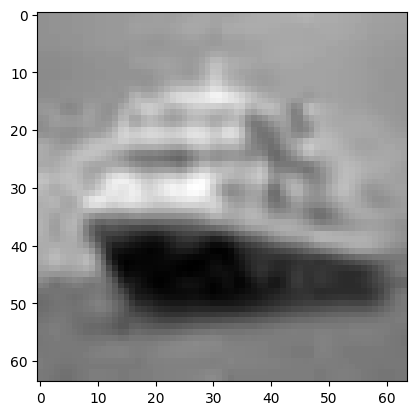

 Prediction 3 (Label: 2)


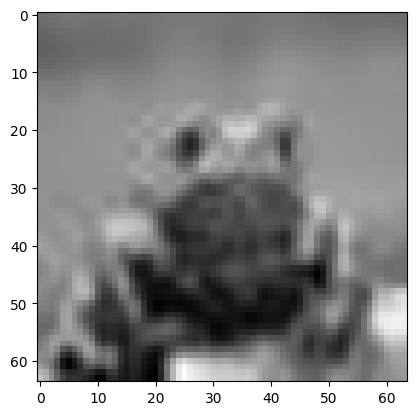

 Prediction 4 (Label: 1)


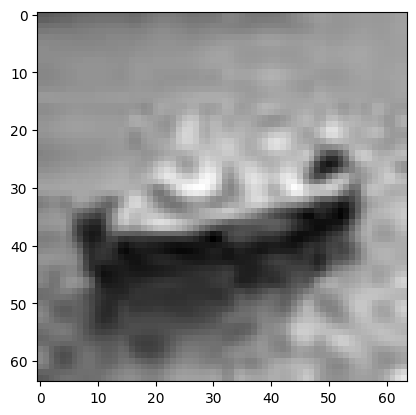

 Prediction 5 (Label: 4)


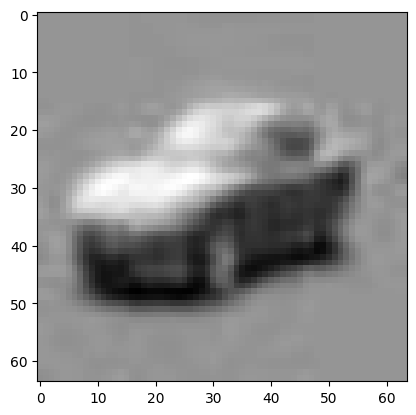

------------------------------
Test Image 2 (True Label: 8)
 Prediction 1 (Label: 8)


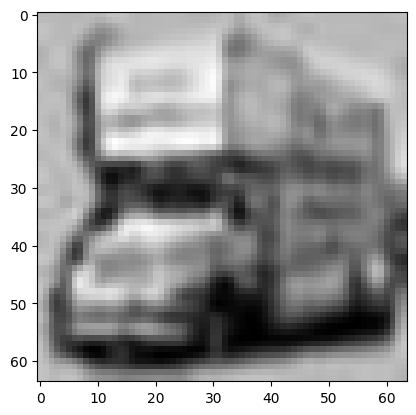

 Prediction 2 (Label: 1)


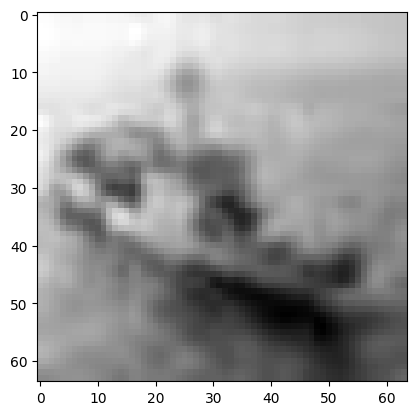

 Prediction 3 (Label: 7)


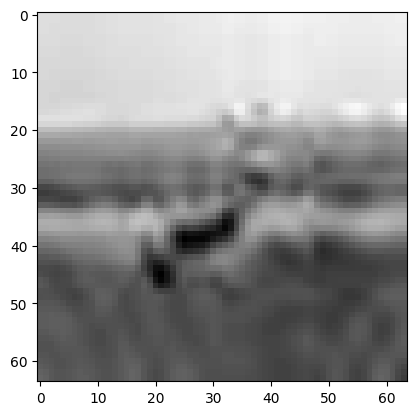

 Prediction 4 (Label: 1)


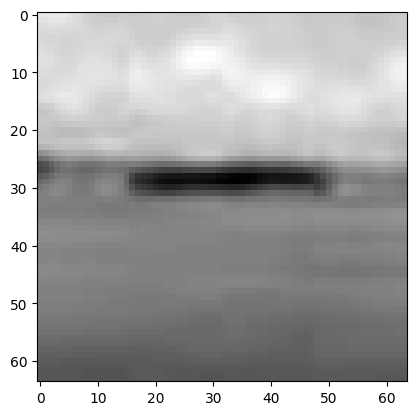

 Prediction 5 (Label: 2)


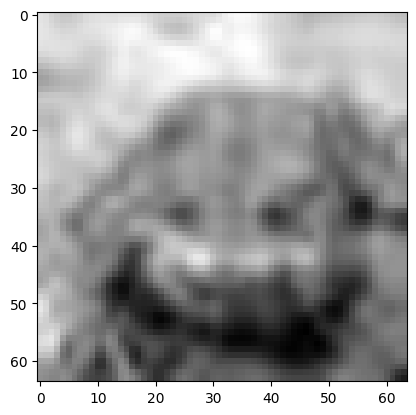

------------------------------
Test Image 3 (True Label: 1)
 Prediction 1 (Label: 1)


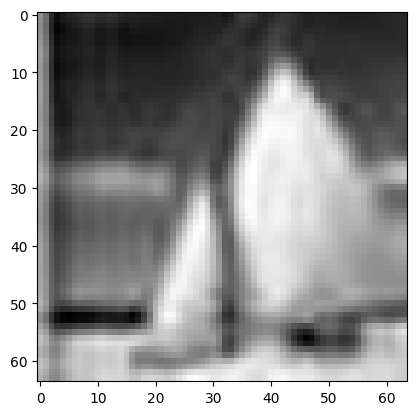

 Prediction 2 (Label: 6)


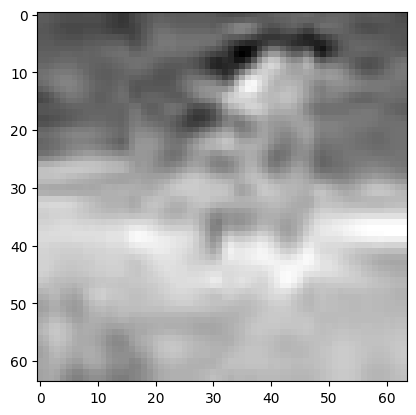

 Prediction 3 (Label: 3)


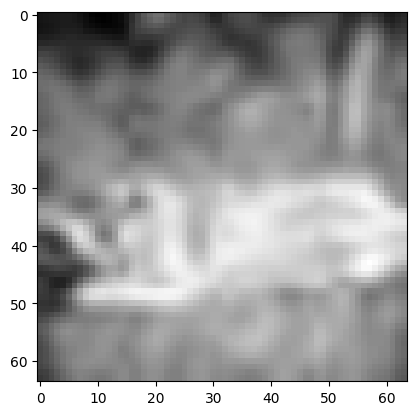

 Prediction 4 (Label: 9)


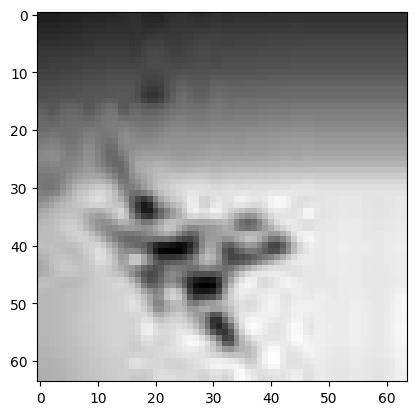

 Prediction 5 (Label: 3)


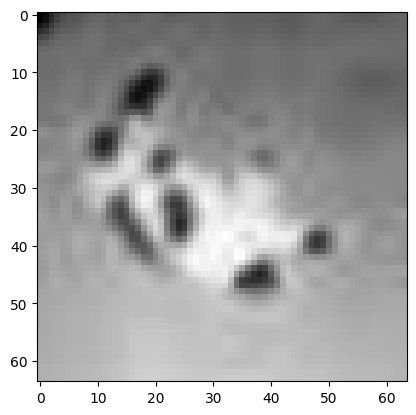

------------------------------
Test Image 4 (True Label: 5)
 Prediction 1 (Label: 5)


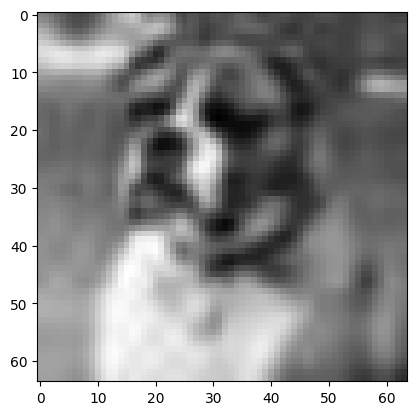

 Prediction 2 (Label: 9)


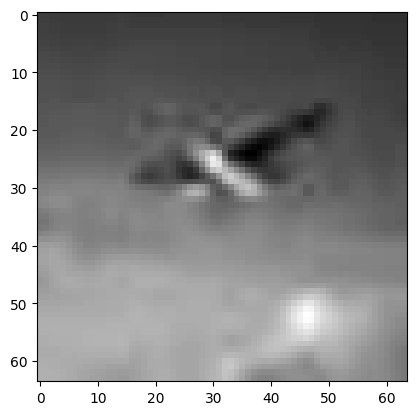

 Prediction 3 (Label: 9)


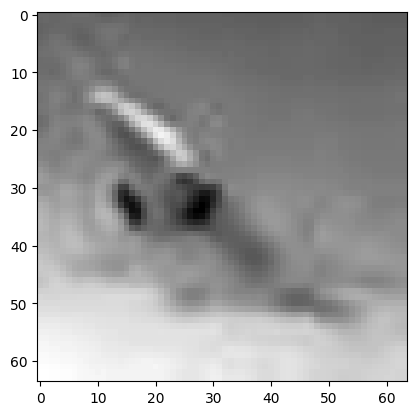

 Prediction 4 (Label: 9)


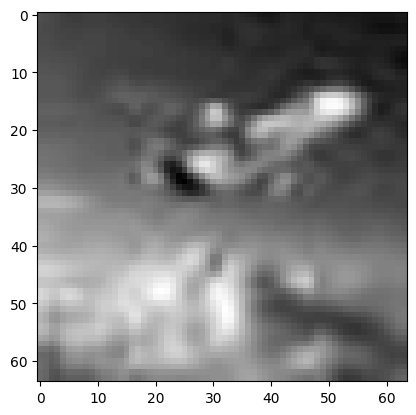

 Prediction 5 (Label: 3)


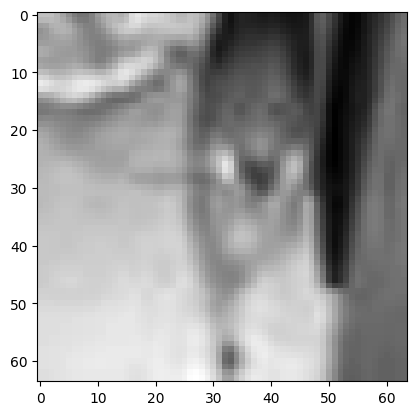

------------------------------
Test Image 5 (True Label: 4)
 Prediction 1 (Label: 4)


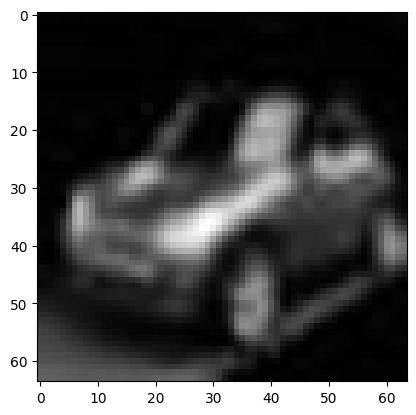

 Prediction 2 (Label: 8)


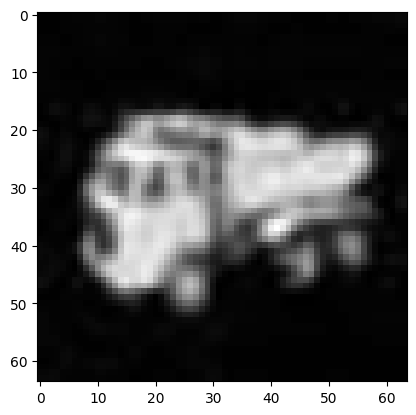

 Prediction 3 (Label: 4)


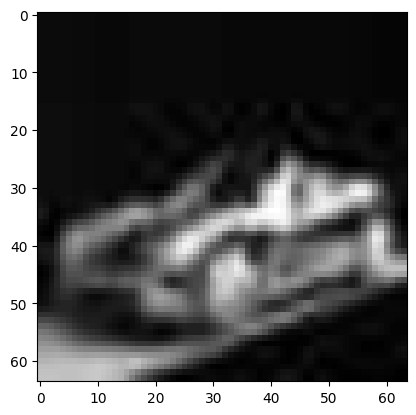

 Prediction 4 (Label: 7)


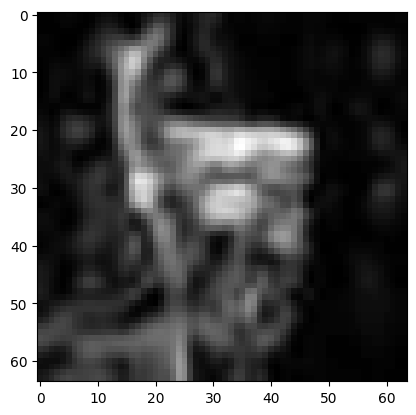

 Prediction 5 (Label: 6)


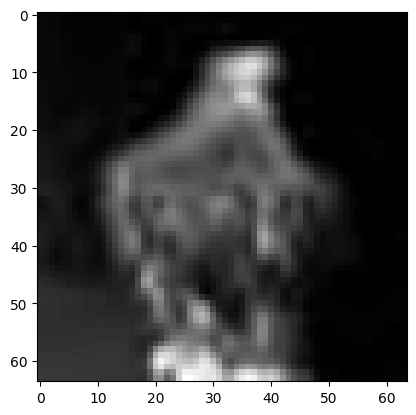

------------------------------


In [ ]:
# Select 5 random images from training dataset for testing
num_test_images = 5
test_indices = random.sample(range(len(X)), num_test_images)
test_images = [X[i] for i in test_indices]
test_labels = [y[i] for i in test_indices]

# Train a K-NN model
k = 11
distance_metric = 'manhattan'
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
knn_classifier.fit(X, y)

test_prediction = []


for test_image, test_label in zip(test_images, test_labels):
    distances, indices = knn_classifier.kneighbors([test_image], n_neighbors=num_test_images)
    images = [X[i] for i in indices[0]]
    labels = [y[i] for i in indices[0]]
    test_prediction.append((test_image, test_label,images,labels))

# Display the results
for i, (test_image, test_label, images, labels) in enumerate(test_prediction):
    print(f"Test Image {i + 1} (True Label: {test_label})")
    for j, (top_image, top_label) in enumerate(zip(images,labels)):
        print(f" Prediction {j + 1} (Label: {top_label})")
        plt.imshow(top_image.reshape((64, 64)), cmap='gray')
        plt.show()
    print("-" * 30)